# Spinning Triangle

A very simple example to show the bare minimum required to render an image using NeverEngine.

The `ModuleStorage::ModuleStorage();` is a class that dynamically loads the modules of the engine, these are, for example, the rendering abstractions (e.g. for vulkan) or peripherals.

With it initialized we can now interface with the modules to generate our data, we first create some shaders:

```cpp
const NECore::ShaderHandle phong_shader = modules.AddShader(
        {SHADER_PATH "spinning.vert.vert",
         SHADER_PATH "spinning.vert.frag"});
```

All we do is pass the absolute or relative path to our shader code and the rendering module will parse and construct them for us. Now we can use the shader handle to refer to this specific shader program whenever we need to.

Then we create a gallery:

```cpp
auto gallery = NECore::Gallery(
        ModuleStorage::GpuAllocateBuffer, ModuleStorage::GpuAllocateImage);
```

This is an optional but very convenient object to store rendering data. It is designed to convert any kind of mesh, image or data buffer into the appropriate GPU objects. In general we just need to supply a method to indicate how the specific objects we are passing should be serialized, for example the tempalte parameter in `StoreMesh<SerializeColorVertex>(vertices, "verts");` tells the gallery to use `SerializeColorVertex` to conver a `std::vector<Vertex>` into the appropriate data buffers.
 
Then we just load the data needed to render the model:

```cpp
NECore::RenderRequest request = {shader, gallery.GetGpuMeshData("verts")};
```

Inside the for loop we calculate a 2x2 roation matrix and finally call our draw method. One thing to be weary of, Never Engine doesn't have built in uniform objects, rather any continuous POD (that is any POD without pointer members or members that wrap pointers) can be passed, immediately followed by the binding index of where the uniform will be in teh shader. The engine will handle everything under the hood to serialize that data and set it to the correct binding point.

Once everything is setup we should be able to see the following spinning triangle on a window.

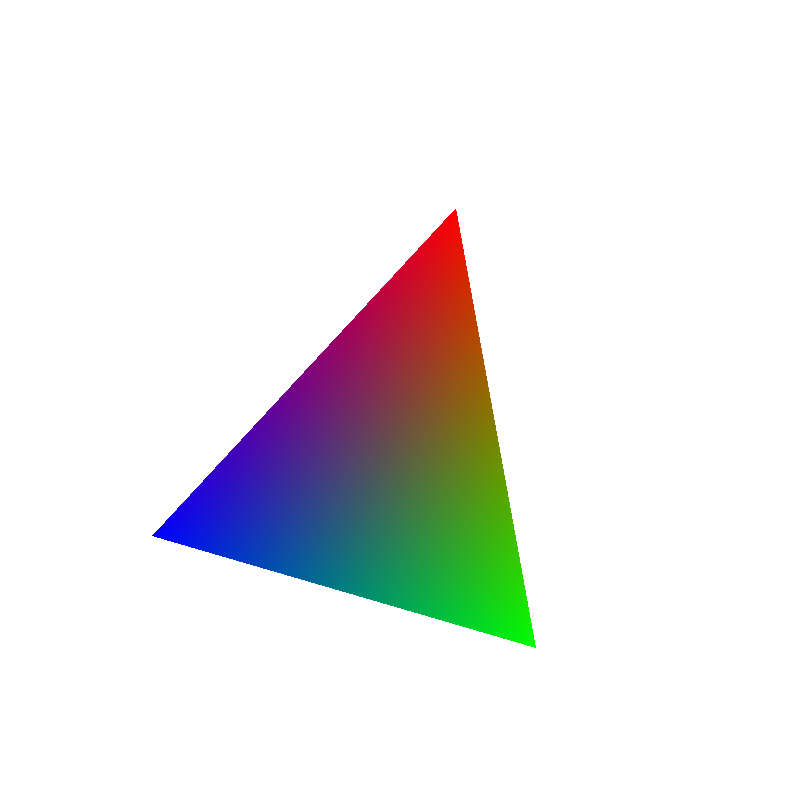

In [2]:
import os
import sys
import pathlib

parentdir = os.path.dirname(pathlib.Path().resolve())

sys.path.insert(0, parentdir) 

import run_example

name = run_example.ScreenShotExample(os.path.abspath(pathlib.Path().resolve()))

from IPython.display import Image

Image(filename=f'Documentation/{name}.png')  